In [15]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pydataset as data

from env import host, username, password
from prepare import prep_telco_data, telco_split
import acquire


In [2]:
telco_df = acquire.get_telco_data()


In [3]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
telco_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [6]:
telco_df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [7]:
telco_df['total_charges'] = telco_df['total_charges'] + '0'

In [8]:
telco_df['total_charges'] = telco_df['total_charges'].astype('float')
telco_df['total_charges'].dtype

dtype('float64')

In [9]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [10]:
telco_df.duplicated().sum()

0

In [11]:
# list the current columns
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [12]:
#use nunique to look at the obj data types
telco_df.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [13]:
telco_df.head().T


,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [17]:
telco_df = prep_telco_data(telco_df)

In [ ]:
telco_df.info

In [ ]:
telco_df.head().T

In [ ]:
telco_df.senior_citizen

([<matplotlib.axis.XTick at 0x7f9a064239d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

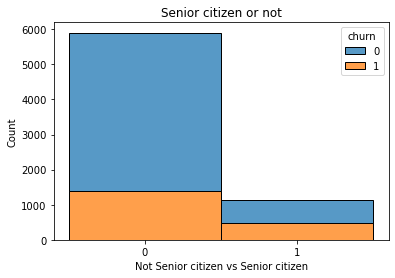

In [30]:
sns.histplot(telco_df,
             x=telco_df.senior_citizen,
             hue='churn',
             multiple='stack',
             discrete=True)

plt.title("Senior citizen or not")
plt.xlabel('Not Senior citizen vs Senior citizen')

#plt.xlim(0, telco_df.senior_citizen.max());
plt.xticks(np.arange(telco_df.senior_citizen.min(), telco_df.senior_citizen.max()+1, 1.0))

In [ ]:
sns.histplot(data=telco_df,
            x=telco_df.monthly_charges,
            hue=telco_df.churn,
            multiple='stack')

plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges (in USD)')

plt.xlim(telco_df.monthly_charges.min(),
         telco_df.monthly_charges.max())

# plt.xticks(np.linspace(18, 120, 24));

In [31]:
telco_df.churn

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    1
Name: churn, Length: 7043, dtype: int64

In [32]:
# telco_df['churn'] = (telco_df['churn'] == 'Yes').astype(int)

In [33]:
# df_dummies = pd.get_dummies(telco_df.gender, drop_first=True)

In [34]:
# telco_df = pd.concat([telco_df, df_dummies],axis=1)

    # Drop the column, we do not need the string version of gender
#telco_df = telco_df.drop('gender', axis=1)
#print('Dummy variables for gender created as "male".')

In [35]:
telco_df.head().T


,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,0,1,0,1,1
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1


In [36]:
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'online services',
 'streaming_services']

In [37]:
telco_df2 = telco_df.drop(columns=['payment_type_id', 'internet_service_type', 'contract_type_id', 'customer_id'])

In [38]:
telco_df2.info

<bound method DataFrame.info of       internet_service_type_id  gender  senior_citizen  partner  dependents  \
0                            1       0               0        1           1   
1                            1       1               0        0           0   
2                            1       0               0        0           0   
3                            1       1               0        1           1   
4                            1       1               0        1           0   
...                        ...     ...             ...      ...         ...   
7038                         3       0               0        1           1   
7039                         3       0               0        0           0   
7040                         3       0               0        0           0   
7041                         3       1               0        0           0   
7042                         3       0               0        0           0   

      tenure  phone

In [46]:
# split the data
train, validate, test = telco_split(telco_df2)


In [47]:
train.shape

(3943, 18)

In [48]:
train

,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,online services,streaming_services
5642,3,0,0,1,1,23,1,1,0,0,1,25.60,514.75,0,2,1,0,0
3338,2,1,0,0,0,27,1,1,1,0,1,100.50,2673.45,0,1,1,0,2
4273,2,0,1,0,0,7,1,0,0,0,1,89.15,574.35,0,0,0,0,2
2382,1,0,0,1,0,47,1,0,0,0,1,58.60,2723.40,0,0,1,1,1
2655,2,1,0,0,0,41,1,0,0,1,1,99.65,4220.35,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2,1,0,1,1,13,1,1,0,0,1,74.40,896.75,1,0,1,0,0
262,1,0,0,1,0,33,0,0,1,1,0,59.55,2016.30,0,2,1,1,2
3271,2,1,0,1,0,67,1,1,1,0,0,104.10,7040.85,1,1,0,1,2
3150,2,1,0,0,0,69,1,1,0,1,1,105.20,7386.05,0,1,1,1,2


In [49]:

X_train, y_train = train.drop(columns='churn'), train['churn']
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

In [50]:
train.churn.value_counts(), train.churn.value_counts(normalize=True)

(0    2897
 1    1046
 Name: churn, dtype: int64,
 0    0.73472
 1    0.26528
 Name: churn, dtype: float64)

In [51]:
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(X_train, y_train)
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7347


In [92]:
dt1 = DecisionTreeClassifier(random_state=123)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

0.9979710880040579

In [116]:
for m in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=m, random_state=123)
    dt.fit(X_train, y_train)
    print(f'Model: {m} when m is {m}')
    print(f'training score: {dt.score(X_train, y_train):.2%}')
    print(f'validate score: {dt.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when m is 1
training score: 73.47%
validate score: 73.45%
__________________________________________________________
Model: 2 when m is 2
training score: 75.04%
validate score: 75.46%
__________________________________________________________
Model: 3 when m is 3
training score: 78.65%
validate score: 78.30%
__________________________________________________________
Model: 4 when m is 4
training score: 78.98%
validate score: 77.23%
__________________________________________________________
Model: 5 when m is 5
training score: 79.38%
validate score: 79.18%
__________________________________________________________
Model: 6 when m is 6
training score: 80.75%
validate score: 78.42%
__________________________________________________________
Model: 7 when m is 7
training score: 82.09%
validate score: 77.94%
__________________________________________________________
Model: 8 when m is 8
training score: 83.57%
validate score: 77.82%
___________________________________________________

In [95]:
dt1 = DecisionTreeClassifier(max_depth=6, random_state=123)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

0.8075069743849861

In [53]:
telco_df2.head().T

,0,1,2,3,4
internet_service_type_id,1.00,1.00,1.00,1.0,1.00
gender,0.00,1.00,0.00,1.0,1.00
senior_citizen,0.00,0.00,0.00,0.0,0.00
partner,1.00,0.00,0.00,1.0,1.00
dependents,1.00,0.00,0.00,1.0,0.00
tenure,65.00,54.00,56.00,20.0,72.00
phone_service,1.00,0.00,0.00,0.0,1.00
multiple_lines,1.00,0.00,0.00,0.0,1.00
device_protection,1.00,0.00,1.00,1.0,1.00
tech_support,1.00,1.00,1.00,1.0,1.00


In [112]:
logit = LogisticRegression()

In [113]:

logit.fit(X_train, y_train)

LogisticRegression()

In [114]:

y_pred = logit.predict(X_train)

In [115]:
print('\nAccuracy of logit classifier on training set:',logit.score(X_train, y_train))


Accuracy of logit classifier on training set: 0.8019274663961451


In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2897
           1       0.65      0.56      0.60      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.72      0.73      3943
weighted avg       0.79      0.80      0.80      3943



In [59]:
corr_df = train.corr()


In [60]:
corr_df.sort_values(by='churn').T


,contract_type,tenure,payment_type,tech_support,online services,dependents,partner,total_charges,device_protection,internet_service_type_id,gender,phone_service,multiple_lines,streaming_services,senior_citizen,paperless_billing,monthly_charges,churn
internet_service_type_id,0.087600,-0.042404,-0.042141,-0.392532,-0.444298,0.048644,0.009531,-0.076875,-0.315684,1.000000,0.000032,0.391954,0.019317,-0.271091,-0.028488,-0.139070,-0.312810,-0.043897
gender,0.000909,0.004282,-0.008913,-0.019327,-0.023338,-0.007656,-0.014710,-0.010860,-0.007760,0.000032,1.000000,-0.009084,-0.006712,-0.004899,0.007243,-0.012850,-0.012991,0.006885
senior_citizen,-0.162383,0.007666,-0.023511,-0.075292,0.009155,-0.201859,0.021704,0.033500,0.054971,-0.028488,0.007243,0.017884,0.137272,0.134006,1.000000,0.170268,0.230111,0.165482
partner,0.284303,0.366470,0.149661,0.100511,0.174967,0.463617,1.000000,0.132626,0.140242,0.009531,-0.014710,0.041129,0.155811,0.124095,0.021704,-0.028135,0.096066,-0.137696
dependents,0.250273,0.160178,0.102038,0.071267,0.075834,1.000000,0.463617,0.032951,0.013517,0.048644,-0.007656,0.000945,-0.013628,-0.049786,-0.201859,-0.114746,-0.117644,-0.160315
tenure,0.660485,1.000000,0.392603,0.328066,0.433219,0.160178,0.366470,0.381461,0.349927,-0.042404,0.004282,0.006187,0.325379,0.314387,0.007666,-0.006974,0.250854,-0.352282
phone_service,-0.002429,0.006187,-0.007627,-0.096026,-0.082473,0.000945,0.041129,0.043087,-0.069898,0.391954,-0.009084,1.000000,0.284602,-0.027634,0.017884,0.021742,0.255629,0.011995
multiple_lines,0.101511,0.325379,0.116511,0.106113,0.196063,-0.013628,0.155811,0.215692,0.201066,0.019317,-0.006712,0.284602,1.000000,0.294829,0.137272,0.172271,0.501330,0.041917
device_protection,0.216590,0.349927,0.167897,0.342797,0.371675,0.013517,0.140242,0.262711,1.000000,-0.315684,-0.007760,-0.069898,0.201066,0.442158,0.054971,0.100626,0.481129,-0.063270
tech_support,0.302377,0.328066,0.176395,1.000000,0.403070,0.071267,0.100511,0.184237,0.342797,-0.392532,-0.019327,-0.096026,0.106113,0.322459,-0.075292,0.039535,0.341569,-0.176822


highest churn rate, positive and negative: 

contract_type - negative, 

tenure - negative, 

paperless_billing - positive, 

monthly_charges - positive

In [62]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [76]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
y_pred = knn.predict(X_train)

In [65]:
print('\nAccuracy of logit classifier on training set:',knn.score(X_train, y_train))


Accuracy of logit classifier on training set: 0.8318539183362922


In [70]:
#for k in range(1, 13):
#    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
#    accuracy = knn.score(X_test, y_test)
#    print(f'{k:2d}: {accuracy:.2%}')

In [67]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k} when k is {k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when k is 1
training score: 99.80%
validate score: 70.37%
__________________________________________________________
Model: 2 when k is 2
training score: 85.59%
validate score: 74.93%
__________________________________________________________
Model: 3 when k is 3
training score: 85.21%
validate score: 73.92%
__________________________________________________________
Model: 4 when k is 4
training score: 82.65%
validate score: 76.52%
__________________________________________________________
Model: 5 when k is 5
training score: 83.19%
validate score: 75.69%
__________________________________________________________
Model: 6 when k is 6
training score: 82.02%
validate score: 77.47%
__________________________________________________________
Model: 7 when k is 7
training score: 82.02%
validate score: 76.40%
__________________________________________________________
Model: 8 when k is 8
training score: 81.56%
validate score: 77.53%
___________________________________________________

In [88]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y_pred = knn.predict(X_train)

In [91]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2897
           1       0.76      0.40      0.53      1046

    accuracy                           0.81      3943
   macro avg       0.79      0.68      0.70      3943
weighted avg       0.80      0.81      0.79      3943



In [77]:
print('\nAccuracy of logit classifier on training set:',knn.score(X_train, y_train))


Accuracy of logit classifier on training set: 0.8075069743849861


In [ ]:
X_train.head().T


Is customer churn independent of whether they have a month-to-month contract or other types of contracts?

\$H_{O}$ Churn is independent of whether they have a month-to-month contract or other types of contracts.

\$H_{a}$ Churn is dependent on whether they have a month-to-month contract or other types of contracts.

In [ ]:
type_of_contract = np.where((X_train['contract_type']==0), 1, 0)

In [ ]:
result1 = pd.crosstab(type_of_contract, y_train)
result1 = result1.rename(index={0:'Year/Year +', 1: 'Month-to-Month'}, columns={0:'No Churn', 1:'Churn'})
result1.index.name=''
result1.columns.name=''

In [ ]:
result1

In [ ]:
alpha = 0.05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(result1)

print(("chi2: {:.2f}\np: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))


In [ ]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Is customer churn independent of whether they are a senior citizen or not?

\$H_{O}$ Churn is independent of whether they are a senior citizen or not.

\$H_{a}$ Churn is dependent on whether they are a senior citizen or not.

In [ ]:
senior = np.where((X_train.senior_citizen==0), 1, 0)

In [ ]:
result2 = pd.crosstab(senior, y_train)
result2 = result2.rename(index={0:'Not Senior', 1: 'Senior'}, columns={0:'No Churn', 1:'Churn'})
result2.index.name=''
result2.columns.name=''

In [ ]:
result2

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(result2)

print(("chi2: {:.2f}\np: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))


In [ ]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')